<h1> ROC Curve</h1>

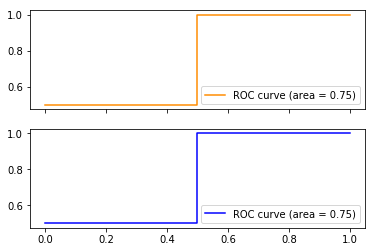

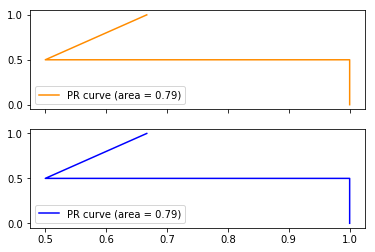

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics


score = np.array([0.1, 0.4, 0.35, 0.8])
y = np.array([0, 0, 1, 1])

fpr, tpr, thresholds = metrics.roc_curve(y, score, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

precision, recall, _ = metrics.precision_recall_curve(y, score)

pr_auc = metrics.auc(recall, precision)

roc_x = []
roc_y = []

pr_x = [0.0]
pr_y = [1.0]

min_score = min(score)
max_score = max(score)
thr = np.linspace(min_score, max_score, 30)
thr = np.flip(thr)
#print(thresholds, thr)

P = sum(y)
N = len(y) - P
AUC = 0.0

for (_, T) in enumerate(thr):
    FP=0
    TP=0
    FN = 0
    TN = 0
    for i in range(0, len(score)):
        #print(score[i])
        if (score[i] > T):
            if (y[i]==1):
                TP = TP + 1
            else:
                FP = FP + 1
        else:
            if (y[i]==1):
                FN = FN + 1
            else:
                TN = TN + 1
                
    FPR = FP/float(N)
    TPR = TP/float(P)
    if ((TP + FP) > 0.0):
        pr = TP / float(TP + FP)
        re = TP / float(TP + FN) #TPR
        pr_x.append(re)
        pr_y.append(pr)
    if(FPR == 0.0 and TPR == 0.0):
        continue
    roc_x.append(FPR)
    roc_y.append(TPR)

roc_x.append(1.0)
roc_y.append(1.0)
AUC = np.trapz(roc_y, roc_x)
PR = np.trapz(pr_y, pr_x)
#print(AUC)

#ROC
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
axarr[1].plot(roc_x, roc_y, color='blue', label='ROC curve (area = %0.2f)' % AUC)

axarr[0].legend(loc="lower right")
axarr[1].legend(loc="lower right")

#PR
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(precision, recall, color='darkorange', label='PR curve (area = %0.2f)' % pr_auc)


axarr[1].plot(pr_y, pr_x, color='blue', label='PR curve (area = %0.2f)' % PR)

axarr[0].legend(loc="lower left")
axarr[1].legend(loc="lower left")

plt.show()